<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
<h1>DECISION TREE: KYPHOSIS</h1>    </font>
</div>

Kyphosis or 'hunchback' is a deformity of the spine that manifests as an abnormal rounding of the upper back.<img src="images/bollerug.png" alt="Banner" width="400"/>
Kyphosis can occur at any age, but is common in young adults. Often patients are operated on but the condition is still present after surgery.Based on various patient characteristics, they want to be able to predict whether a patient will be helped by the surgery or not.To solve this classification problem, one can construct a decision tree. <br>Source: https://www.kaggle.com/sanikabhagat/kyphosis-prediction-using-dec-trees-rndm-forest

### Example Solution

In [1]:
import numpy as npimport matplotlib.pyplot as pltimport pandas as pdfrom sklearn import tree

In [2]:
kyphosis = pd.read_csv("data/kyphosis.csv")

In [3]:
kyphosis

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
# make categorical variables numerickyphosis["Kyphosis"]= kyphosis["Kyphosis"].replace("absent", 0)kyphosis["Kyphosis"]= kyphosis["Kyphosis"].replace("present", 1)

In [5]:
kyphosis

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [6]:
kyphosis = np.array(kyphosis)

In [7]:
kyphosis

array([[  0,  71,   3,   5],
       [  0, 158,   3,  14],
       [  1, 128,   4,   5],
       [  0,   2,   5,   1],
       [  0,   1,   4,  15],
       [  0,   1,   2,  16],
       [  0,  61,   2,  17],
       [  0,  37,   3,  16],
       [  0, 113,   2,  16],
       [  1,  59,   6,  12],
       [  1,  82,   5,  14],
       [  0, 148,   3,  16],
       [  0,  18,   5,   2],
       [  0,   1,   4,  12],
       [  0, 168,   3,  18],
       [  0,   1,   3,  16],
       [  0,  78,   6,  15],
       [  0, 175,   5,  13],
       [  0,  80,   5,  16],
       [  0,  27,   4,   9],
       [  0,  22,   2,  16],
       [  1, 105,   6,   5],
       [  1,  96,   3,  12],
       [  0, 131,   2,   3],
       [  1,  15,   7,   2],
       [  0,   9,   5,  13],
       [  0,   8,   3,   6],
       [  0, 100,   3,  14],
       [  0,   4,   3,  16],
       [  0, 151,   2,  16],
       [  0,  31,   3,  16],
       [  0, 125,   2,  11],
       [  0, 130,   5,  13],
       [  0, 112,   3,  16],
       [  0, 1

In [8]:
# considered parameters are 'age', 'number' and 'start'# values of these parameters are in resp. column 1, 2 and 3 of the matrix# each row corresponds to one child# first column indicates whether person has kyphosis ('1') or not ('0').

In [9]:
# distinguish parameters and classparameters = kyphosis[:, 1:]        # last 3 columns of the matrix are the considered parametersclass = kyphosis[:, 0]             # last column are class to which person belongs

In [10]:
print(parameters)

[[ 71   3   5]
 [158   3  14]
 [128   4   5]
 [  2   5   1]
 [  1   4  15]
 [  1   2  16]
 [ 61   2  17]
 [ 37   3  16]
 [113   2  16]
 [ 59   6  12]
 [ 82   5  14]
 [148   3  16]
 [ 18   5   2]
 [  1   4  12]
 [168   3  18]
 [  1   3  16]
 [ 78   6  15]
 [175   5  13]
 [ 80   5  16]
 [ 27   4   9]
 [ 22   2  16]
 [105   6   5]
 [ 96   3  12]
 [131   2   3]
 [ 15   7   2]
 [  9   5  13]
 [  8   3   6]
 [100   3  14]
 [  4   3  16]
 [151   2  16]
 [ 31   3  16]
 [125   2  11]
 [130   5  13]
 [112   3  16]
 [140   5  11]
 [ 93   3  16]
 [  1   3   9]
 [ 52   5   6]
 [ 20   6   9]
 [ 91   5  12]
 [ 73   5   1]
 [ 35   3  13]
 [143   9   3]
 [ 61   4   1]
 [ 97   3  16]
 [139   3  10]
 [136   4  15]
 [131   5  13]
 [121   3   3]
 [177   2  14]
 [ 68   5  10]
 [  9   2  17]
 [139  10   6]
 [  2   2  17]
 [140   4  15]
 [ 72   5  15]
 [  2   3  13]
 [120   5   8]
 [ 51   7   9]
 [102   3  13]
 [130   4   1]
 [114   7   8]
 [ 81   4   1]
 [118   3  16]
 [118   4  16]
 [ 17   4  10]
 [195   2 

In [11]:
print(class)

[0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0]


In [12]:
# generating a decision tree based on datadecision_tree = tree.DecisionTreeClassifier(criterion="gini")   # tree is created via gini-indexdecision_tree.fit(parameters, class)                            # generate tree that corresponds to data

DecisionTreeClassifier()

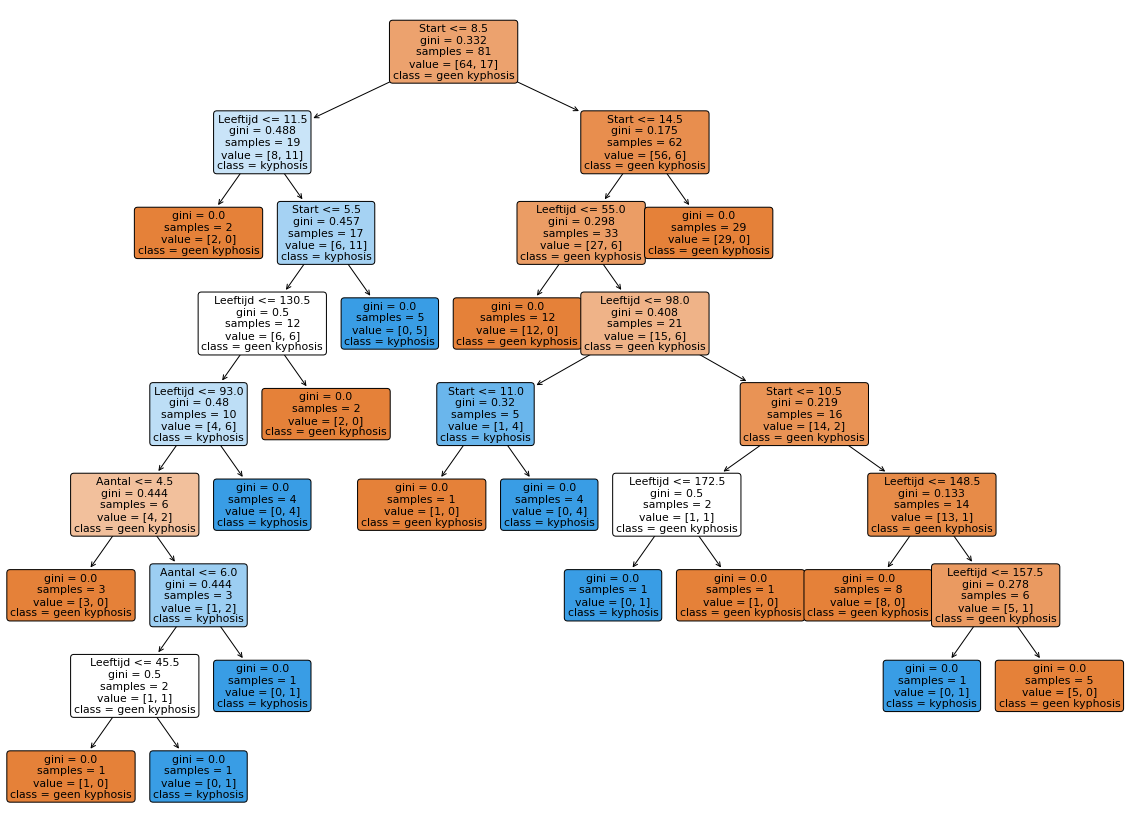

In [15]:
plt.figure(figsize=(20,15))tree.plot_tree(decision_tree,class_names=["no kyphosis", "kyphosis"],feature_names=["Age", "Quantity", "Start"],               filled=True, rounded=True)plt.show()

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
AI in Healthcare Notebook, see <a href="http://www.aiopschool.be">AI at School</a>, by F. Wyffels & N. Gesquière is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.